#### Week 4 - AI-Powered Data Analysis & Automation
This project aims to apply AI-driven techniques for data cleaning, visualization, predictive modeling, and business strategy development. The dataset contains customer transactional and demographic information, including age, gender, income, spending habits, credit scores, marketing spend, and sales outcomes from a retail business. It covers the period from January 1, 2024, to April 29, 2024, capturing seasonal and behavioral insights during that timeframe.

In [1]:
#Import necessary libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder

In [2]:
#Load the data
df = pd.read_csv('/home/minhas/uptrail/project4/data/raw_dataset_week_4.csv', sep = ',')

In [31]:
df.head(10)

,date,customer_id,age,gender,income,spending_score,credit_score,loan_amount,previous_defaults,marketing_spend,purchase_frequency,seasonality,sales,customer_churn,defaulted
0,2024-04-12,1,56,0,142418.0,7,391.0,8083.0,1,15376,3,1,32526,0,0
1,2024-02-21,2,69,1,63088.0,82,652.0,34328.0,2,6889,6,1,78493,0,0
2,2024-04-02,3,46,1,136868.0,91,662.0,47891.0,2,6054,29,2,57198,1,0
3,2024-01-15,4,32,0,84772.0,34,644.0,25103.0,2,4868,8,2,48395,0,0
4,2024-04-16,5,60,1,59811.0,91,469.0,44891.0,1,17585,12,0,29031,1,0
5,2024-03-12,6,25,1,134825.0,17,655.0,15754.0,1,19881,13,1,80542,0,0
6,2024-03-01,7,38,0,75479.0,43,490.0,39447.0,1,2842,11,2,42701,1,1
7,2024-01-21,8,56,1,84772.0,59,721.0,20901.0,2,11058,12,2,30939,1,0
8,2024-04-12,9,36,1,107369.0,51,306.0,38004.0,1,10101,1,2,54145,0,0
9,2024-03-23,10,40,1,137520.0,54,432.0,12446.0,0,13497,17,2,25324,0,1


In [3]:
print(f'No of rows: {df.shape[0]}\nNo of columns: {df.shape[1]}')
print(f'Info:')
print(f'{df.info()}')

No of rows: 500
No of columns: 15
Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                494 non-null    object 
 1   Customer_ID         500 non-null    int64  
 2   Age                 500 non-null    int64  
 3   Gender              500 non-null    object 
 4   Income              450 non-null    float64
 5   Spending_Score      500 non-null    int64  
 6   Credit_Score        450 non-null    float64
 7   Loan_Amount         450 non-null    float64
 8   Previous_Defaults   500 non-null    int64  
 9   Marketing_Spend     500 non-null    int64  
 10  Purchase_Frequency  500 non-null    int64  
 11  Seasonality         500 non-null    object 
 12  Sales               500 non-null    int64  
 13  Customer_Churn      500 non-null    int64  
 14  Defaulted           500 non-null    int64  
dtypes: float64(3), in

In [4]:
#Check Duplicates
print(f'Duplicates:.{df.duplicated().sum()}')
df.Customer_ID.duplicated().sum()

Duplicates:.0


0

In [5]:
#Check for null values
df.isnull().sum()

Date                   6
Customer_ID            0
Age                    0
Gender                 0
Income                50
Spending_Score         0
Credit_Score          50
Loan_Amount           50
Previous_Defaults      0
Marketing_Spend        0
Purchase_Frequency     0
Seasonality            0
Sales                  0
Customer_Churn         0
Defaulted              0
dtype: int64

In [8]:

#Convert columns to lowercase
df.columns = df.columns.str.lower()

In [9]:
#Summary Statistics
df.describe()

,customer_id,age,income,spending_score,credit_score,loan_amount,previous_defaults,marketing_spend,purchase_frequency,sales,customer_churn,defaulted
count,500.000000,500.000000,450.000000,500.000000,450.000000,450.000000,500.00000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,250.500000,44.220000,84398.055556,50.862000,573.411111,28456.928889,0.97400,10558.128000,15.350000,54378.954000,0.254000,0.190000
std,144.481833,15.036082,40112.053565,29.125101,157.396644,12427.294976,0.82625,5508.219008,8.475327,27263.106468,0.435734,0.392694
min,1.000000,18.000000,20055.000000,1.000000,300.000000,5163.000000,0.00000,1024.000000,1.000000,5203.000000,0.000000,0.000000
25%,125.750000,32.000000,47175.500000,25.750000,442.000000,17462.000000,0.00000,6041.500000,8.000000,30507.500000,0.000000,0.000000
50%,250.500000,45.000000,85375.500000,51.000000,588.500000,29817.000000,1.00000,10754.000000,16.000000,54032.500000,0.000000,0.000000
75%,375.250000,57.000000,121330.750000,77.000000,697.500000,38544.750000,2.00000,15099.750000,23.000000,78523.750000,1.000000,0.000000
max,500.000000,69.000000,149922.000000,99.000000,848.000000,49936.000000,2.00000,19990.000000,29.000000,99835.000000,1.000000,1.000000


#### Cleaning

In [10]:
#convert date to datetime
df['date'] = pd.to_datetime(df['date'], format='%d-%m-%y')

#Remove rows that has null values in date
df =df.dropna(subset=['date'])

#Handling missing values
df['loan_amount'].fillna(df['loan_amount'].median(), inplace= True)
df['income'].fillna(df['income'].median(), inplace= True)
df['credit_score'].fillna(df['credit_score'].median(), inplace= True)


In [11]:
df.describe()

,date,customer_id,age,income,spending_score,credit_score,loan_amount,previous_defaults,marketing_spend,purchase_frequency,sales,customer_churn,defaulted
count,494,494.000000,494.000000,494.000000,494.000000,494.000000,494.000000,494.000000,494.000000,494.000000,494.000000,494.000000,494.000000
mean,2024-02-29 02:49:04.129554688,249.352227,44.275304,84311.827935,50.977733,574.329960,28467.910931,0.973684,10516.066802,15.301619,54057.394737,0.255061,0.192308
min,2024-01-01 00:00:00,1.000000,18.000000,20055.000000,1.000000,300.000000,5163.000000,0.000000,1024.000000,1.000000,5203.000000,0.000000,0.000000
25%,2024-01-30 00:00:00,125.250000,32.000000,50930.750000,26.000000,453.000000,18968.500000,0.000000,5959.750000,8.000000,30404.750000,0.000000,0.000000
50%,2024-02-29 00:00:00,248.500000,45.000000,84772.000000,51.000000,587.000000,29457.500000,1.000000,10681.500000,16.000000,53059.000000,0.000000,0.000000
75%,2024-04-01 00:00:00,373.750000,57.000000,117644.000000,77.000000,682.750000,37094.500000,2.000000,15060.750000,23.000000,77774.750000,1.000000,0.000000
max,2024-04-29 00:00:00,500.000000,69.000000,149922.000000,99.000000,848.000000,49936.000000,2.000000,19990.000000,29.000000,99835.000000,1.000000,1.000000
std,NaN,144.379983,15.068105,38040.971285,29.073271,149.807864,11793.966843,0.826363,5515.311749,8.507968,27167.959952,0.436337,0.394513


In [12]:
df.isnull().sum()

date                  0
customer_id           0
age                   0
gender                0
income                0
spending_score        0
credit_score          0
loan_amount           0
previous_defaults     0
marketing_spend       0
purchase_frequency    0
seasonality           0
sales                 0
customer_churn        0
defaulted             0
dtype: int64

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 494 entries, 0 to 499
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   date                494 non-null    datetime64[ns]
 1   customer_id         494 non-null    int64         
 2   age                 494 non-null    int64         
 3   gender              494 non-null    object        
 4   income              494 non-null    float64       
 5   spending_score      494 non-null    int64         
 6   credit_score        494 non-null    float64       
 7   loan_amount         494 non-null    float64       
 8   previous_defaults   494 non-null    int64         
 9   marketing_spend     494 non-null    int64         
 10  purchase_frequency  494 non-null    int64         
 11  seasonality         494 non-null    object        
 12  sales               494 non-null    int64         
 13  customer_churn      494 non-null    int64         
 14 

In [14]:
#Check for outliers
Q1 = df['sales'].quantile(0.25)
Q3 = df['sales'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['sales'] < lower_bound) | (df['sales'] > upper_bound)]


In [15]:
outliers

,date,customer_id,age,gender,income,spending_score,credit_score,loan_amount,previous_defaults,marketing_spend,purchase_frequency,seasonality,sales,customer_churn,defaulted


In [16]:
#Exporting clean csv
df.to_csv('/home/minhas/uptrail/project4/data/cleaned_dataset_week_4.csv', index = False)

In [17]:
#Loading the cleaned csv again
df = pd.read_csv('/home/minhas/uptrail/project4/data/cleaned_dataset_week_4.csv')

#### Visualization

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'customer_id'),
  Text(1, 0, 'age'),
  Text(2, 0, 'income'),
  Text(3, 0, 'spending_score'),
  Text(4, 0, 'credit_score'),
  Text(5, 0, 'loan_amount'),
  Text(6, 0, 'previous_defaults'),
  Text(7, 0, 'marketing_spend'),
  Text(8, 0, 'purchase_frequency'),
  Text(9, 0, 'sales'),
  Text(10, 0, 'customer_churn'),
  Text(11, 0, 'defaulted')])

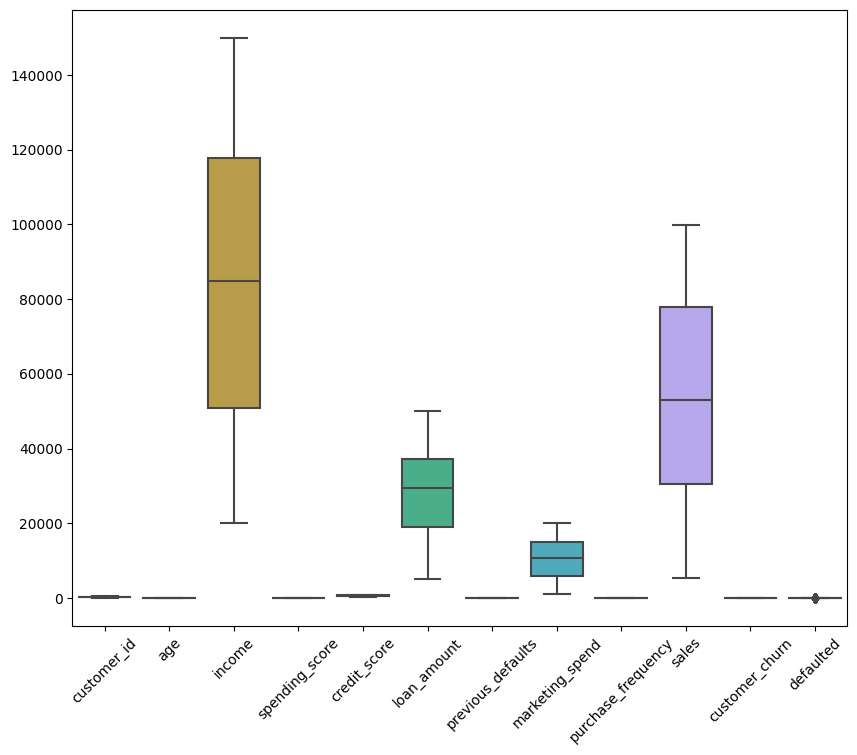

In [18]:
#Check for outliers
plt.figure(figsize=(10,8))
sns.boxplot(data=df.select_dtypes(include='number'))
plt.xticks(rotation = 45)

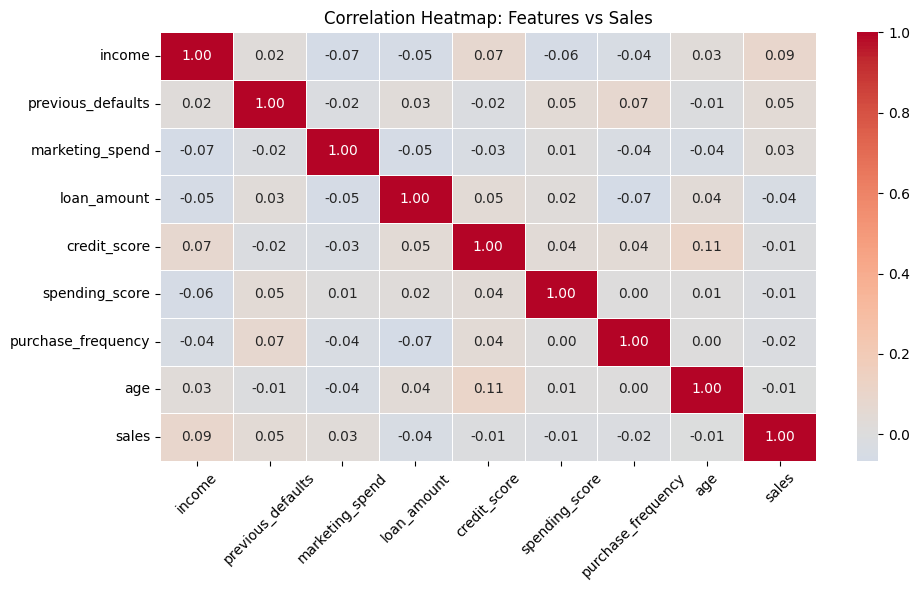

In [36]:
# Compute correlation matrix for numerical features and target
features = ['income', 'previous_defaults', 'marketing_spend', 'loan_amount',
            'credit_score', 'spending_score', 'purchase_frequency', 'age', 'sales']

corr_matrix = df[features].corr()

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, linewidths=0.5, fmt=".2f")
plt.title('Correlation Heatmap: Features vs Sales')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

#### Prediction
Linear Regression Model for Sales forecasting

In [21]:

#  Encode categorical variables: 'gender' and 'seasonality'
label_encoder = LabelEncoder()
df['gender'] = label_encoder.fit_transform(df['gender'])
df['seasonality'] = label_encoder.fit_transform(df['seasonality'])


In [19]:
# #  Select Features & Target
# X =df[['marketing_spend', 'seasonality']]  # Drop ID and date
# y = df['sales']

In [22]:
features = ['age', 'income', 'spending_score', 'credit_score', 'loan_amount',
            'previous_defaults', 'marketing_spend', 'purchase_frequency']
target = 'sales'

# Prepare X and y
X = df[features]
y = df[target]

<Axes: >

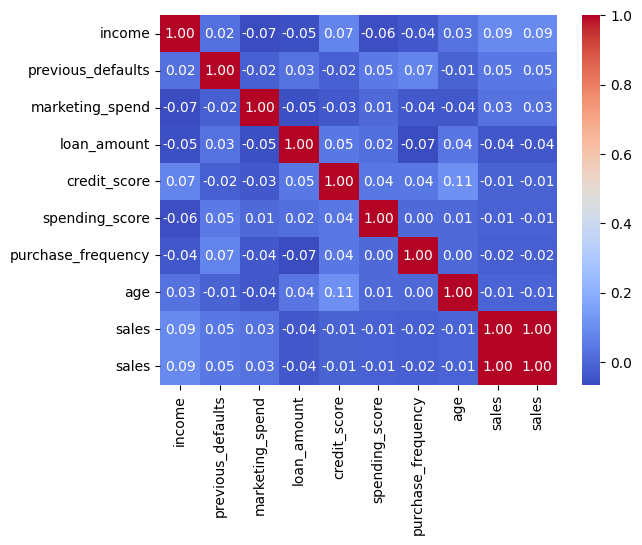

In [35]:
correlation_matrix = df[features + [target]].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

In [25]:
#  Split Data (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
#  Train Linear Regression Model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression()

In [27]:

# Predict on Test Data
y_pred = lr_model.predict(X_test)

In [28]:
# Evaluate the Model
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

In [29]:

print(f"R² Score: {r2:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

R² Score: -0.00
Root Mean Squared Error (RMSE): 27946.14


In [30]:
# Check Feature Coefficients
coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': lr_model.coef_})
print(coefficients.sort_values(by='Coefficient', ascending=False))

              Feature  Coefficient
5   previous_defaults  2409.939352
3        credit_score     1.885952
6     marketing_spend     0.161781
1              income     0.039957
4         loan_amount    -0.064772
2      spending_score    -4.358183
7  purchase_frequency   -18.748589
0                 age   -65.987056


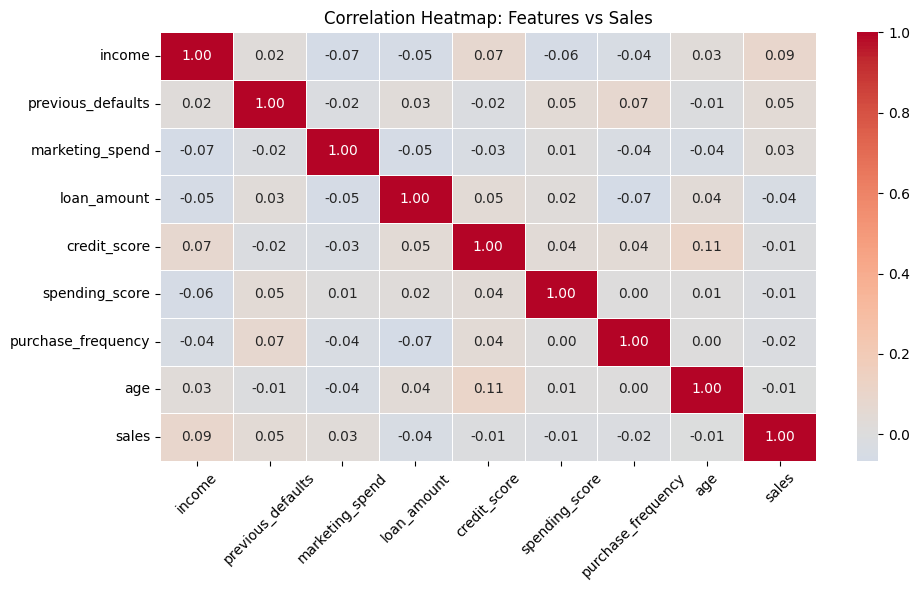